In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

# Suppressing PerformanceWarnings
warnings.filterwarnings('ignore', message="DataFrame is highly fragmented")
# Suppress runtime warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [29]:
# List of file paths
file_paths = [
    "C:/Users/35191/Desktop/ThesisData/piezometers/top1_copy.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/mid1.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/mid2.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/mid3.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/mid4.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/bot.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/bot0.csv",
    "C:/Users/35191/Desktop/ThesisData/piezometers/bot1.csv"
]

#creating a list of dataframe where I can keep all the water level data in the file path
dfs = []
# Read the csv file
for path in file_paths:
    df = pd.read_csv(path, low_memory=False)
#To gather all the df and store into one list
    dfs.append(df)
#combine all the df present in dfs list to form a single dataframe
comb_df = pd.concat(dfs, ignore_index = True)

# Get the list of columns to remove/ as it appears that a column named flag existing in the dataframe
columns_to_remove = []
for col in comb_df.columns:
    if (comb_df[col] == "FLAG").any():
        columns_to_remove.append(col)

# Drop columns with the value "FLAG"
new_df = comb_df.drop(columns = columns_to_remove)

# Drop the first row because it contains an unnecessary information
new_df = new_df.drop(0)


#new_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/downloaded_borehole.csv", index=False)

new_df

,DATA,34/32,41/N1,63/N1,69/N1,74/N1,98/N2,104/N2,113/N1,114/N1,...,559/25,562/19,567/11,573/15,581/41,585/78,587/1,587/101,587/19,587/7
1,01/11/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/12/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/02/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/03/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181030,19/01/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181031,23/01/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,232.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181032,01/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.35,138.03
181033,22/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# function that filters out only the unconfined wells from the downloaded dataset
unconfined_wells_list = "C:/Users/35191/Desktop/ThesisData/piezometers/list_unconfined_wells.csv"

# Filter out only the unconfined wells

def filter_unconfined_wells(unconfined_wells_list):

    # Read the list of unconfined wells
    unconfined_df = pd.read_csv(unconfined_wells_list)
    unconfined_wells_list = unconfined_df['Wells'].tolist()

    # Get the columns to keep
    columns_to_keep = [col for col in new_df.columns if col in unconfined_wells_list]

    #filter the dataframe
    df_filtered = new_df[['DATA'] + columns_to_keep]

    return df_filtered

filter_unconfined_wells(unconfined_wells_list)

df = filter_unconfined_wells(unconfined_wells_list)

#df = df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/combined_cleaned_unconfined_wells1.csv", index = False)

df

,DATA,34/32,219/3,228/52,229/278,229/285,250/37,251/18,251/19,263/12,...,524/114,524/116,524/40,524/49,524/50,524/51,524/82,524/83,532/153,532/75
1,01/11/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/12/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/02/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/03/1979,NaN,71.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181030,19/01/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,194.43,NaN,235.38,236.91,NaN,NaN,NaN,NaN,146.41
181031,23/01/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181032,01/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181033,22/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
new_df = df

all_dates = {}
all_values = {}

# Iterate over each column except the 'DATA' column
for column in new_df.columns:
    if column != 'DATA':
        borehole_id = column # Extract borehole ID from column name
        if borehole_id not in all_dates:
            all_dates[borehole_id] = []
            all_values[borehole_id] = []
        
        # Iterate over rows and extract data
        for x, y in zip(new_df['DATA'], new_df[column]):
            if pd.notnull(x) and pd.notnull(y):
                all_dates[borehole_id].append(x)
                all_values[borehole_id].append(y)

# Create a DataFrame for each borehole with individual date columns
dfs = []
for borehole_id in all_dates:
    borehole_df = pd.DataFrame({
        f'date_{borehole_id}': all_dates[borehole_id],
        f'{borehole_id}': all_values[borehole_id]
    })
    dfs.append(borehole_df)

# Merge all DataFrames on 'dates'
df = pd.concat(dfs, axis=1)

# Output the final DataFrame
#df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/my_boreholes3.csv", index=False)
df

,date_34/32,34/32,date_219/3,219/3,date_228/52,228/52,date_229/278,229/278,date_229/285,229/285,...,date_524/51,524/51,date_524/82,524/82,date_524/83,524/83,date_532/153,532/153,date_532/75,532/75
0,02/01/2015,348.9,01/03/1979,71.21,11/01/2007,71.61,20/02/2009,72.96,24/01/2020,80.93,...,30/01/1996,236.73,10/10/2000,240.48,10/10/2000,233.89,10/10/2000,150.59,01/10/2000,146.31
1,31/01/2015,349,01/06/1979,53.04,09/02/2007,71.72,20/03/2009,72.66,17/02/2020,81.05,...,06/03/1996,238.57,15/11/2000,240.6,15/11/2000,235.2,16/11/2000,152.33,15/10/2000,146.33
2,28/02/2015,348.5,01/08/1979,51.9,07/03/2007,71.9,20/04/2009,72.31,17/03/2020,81.02,...,20/11/1996,241.35,19/12/2000,240.79,20/12/2000,235.7,20/12/2000,153.18,01/11/2000,146.32
3,01/04/2015,320.7,01/10/1979,54.56,19/04/2007,71.34,18/05/2009,71.84,20/04/2020,81.15,...,15/01/1997,242.81,18/01/2001,242.58,18/01/2001,238.35,18/01/2001,154.77,15/11/2000,146.31
4,01/05/2015,349,01/03/1980,57.54,14/05/2007,71.29,17/06/2009,70.65,18/05/2020,81.08,...,30/04/1997,242.35,15/02/2001,242.34,15/02/2001,239.78,15/02/2001,155.11,01/12/2000,146.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<details><summary>Click here for the plot plot of water level</summary>

def wte_plot(df, index):
    col1 = df.columns[(index - 0) * 2]
    col2 = df.columns[(index - 0) * 2 + 1]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Drop rows with missing values in the current pair of columns
    df.dropna(subset=[col1, col2], inplace=True)

    # Convert the date column to datetime format
    df[col1] = pd.to_datetime(df[col1], format='%d/%m/%Y')

    # Extract x and y data
    x = df[col1]
    y = df[col2].astype(float)

    # Set major locator for x-axis (every 500 days)
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=300))

    # Plot the data
    plt.plot(x, y)

    # Add labels and show the plot
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Water Level', fontsize=15)
    plt.title(f'Plot of {col2} against {col1}', fontsize=15)
    plt.show()

wte_plot(df, 1)

</details>

In [32]:
borehole_names = []
days_between_measurements = []
for col_name in df.columns:
    if not col_name.startswith('date_'):
        borehole_names.append(f'day_{col_name}')
    
    else:
        date_col = col_name
        df[date_col]= pd.to_datetime(df[date_col], format = "%d/%m/%Y")
        days_between_measurement = df[date_col].diff().dt.days
        days_between_measurements.append(days_between_measurement)

days = pd.DataFrame(dict(zip(borehole_names, days_between_measurements)))
#days.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/days.csv", index=False)
days

,day_34/32,day_219/3,day_228/52,day_229/278,day_229/285,day_250/37,day_251/18,day_251/19,day_263/12,day_296/3,...,day_524/114,day_524/116,day_524/40,day_524/49,day_524/50,day_524/51,day_524/82,day_524/83,day_532/153,day_532/75
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,92.0,29.0,28.0,24.0,29.0,42.0,39.0,42.0,91.0,...,122.0,28.0,15.0,1.0,22.0,36.0,36.0,36.0,37.0,14.0
2,28.0,61.0,26.0,31.0,29.0,26.0,35.0,32.0,35.0,29.0,...,62.0,28.0,13.0,1.0,1.0,259.0,34.0,35.0,34.0,17.0
3,32.0,61.0,43.0,28.0,34.0,43.0,36.0,28.0,36.0,63.0,...,181.0,43.0,14.0,1.0,1.0,56.0,30.0,29.0,29.0,14.0
4,30.0,152.0,25.0,30.0,28.0,25.0,25.0,31.0,25.0,28.0,...,NaN,20.0,14.0,1.0,1.0,105.0,28.0,28.0,28.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Iterate over the columns to compute the differences
diff_cols = []
borehole_names = []
for col in df.columns:
    if not col.startswith('date_'):
        # Extract water level column name
        water_level_col = col
        borehole_names.append(f'wtf_{water_level_col}')     # Store borehole names
        
        # Convert the water level series to numeric type
        df[water_level_col] = pd.to_numeric(df[water_level_col], errors='coerce')
        # Compute consecutive difference of the water level series
        diff_col = df[water_level_col].diff()
        diff_cols.append(diff_col)

days_between_measurements = []
for col1 in df.columns:
    if col1.startswith('date_'):
        # extract date name
        date_col = col1
        
        df[date_col]= pd.to_datetime(df[date_col], format = "%d/%m/%Y")
        days_between_measurement = df[date_col].diff().dt.days
        days_between_measurements.append(days_between_measurement)

# Calculate wtf rate
wtf_rates = {}
for borehole, diff_col, days_between_measurement in zip(borehole_names, diff_cols, days_between_measurements):
    wtf_rate = diff_col / days_between_measurement
    wtf_rates[borehole] = wtf_rate

# Create DataFrame to display wtf rates for each borehole
wtf_df = pd.DataFrame(wtf_rates)
#wtf_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/wtf_df.csv", index=False)
# Add wtf rate to the DataFrame or use it as needed
wtf_df

,wtf_34/32,wtf_219/3,wtf_228/52,wtf_229/278,wtf_229/285,wtf_250/37,wtf_251/18,wtf_251/19,wtf_263/12,wtf_296/3,...,wtf_524/114,wtf_524/116,wtf_524/40,wtf_524/49,wtf_524/50,wtf_524/51,wtf_524/82,wtf_524/83,wtf_532/153,wtf_532/75
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003448,-0.197500,0.003793,-0.010714,0.005000,0.014138,0.085952,0.086923,-0.002381,0.039780,...,0.002951,0.002143,-0.014667,-0.01,-0.011364,0.051111,0.003333,0.036389,0.047027,0.001429
2,-0.017857,-0.018689,0.006923,-0.011290,-0.001034,0.001538,-0.021143,0.035312,-0.000857,-0.054828,...,-0.010000,0.021071,-0.009231,-0.01,-0.020000,0.010734,0.005588,0.014286,0.025000,-0.000588
3,-0.868750,0.043607,-0.013023,-0.016786,0.003824,-0.007907,-0.083056,-0.026429,-0.000833,0.212698,...,0.002818,-0.011395,-0.010000,0.01,0.000000,0.026071,0.059667,0.091379,0.054828,-0.000714
4,0.943333,0.019605,-0.002000,-0.039667,-0.002500,-0.001600,-0.120800,-0.102258,-0.003600,0.101786,...,NaN,-0.003500,-0.008571,-0.03,-0.020000,-0.004381,-0.008571,0.051071,0.012143,-0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Extract columns associated with dates
date_c1 = [df[col] for col in df.columns if col.startswith('date_')]

# Extract columns associated with water levels
wat_lev = [df[col] for col in df.columns if col[0].isdigit()]

# Extract columns associated with wtf rates
wtf = [col for col in wtf_df.columns]

# Pair digit columns with 'date_' and 'wtf' columns using index method
paired_columns = [(date_c1[i], wat_lev[i], wtf[i]) for i in range(min(len(date_c1), len(wat_lev), len(wtf)))]

# Create new DataFrame by concatenating paired columns
df2 = pd.concat([date_col.to_frame().join(water_level.to_frame()).join(wtf_df[wtf_col]) for date_col, water_level, wtf_col in paired_columns], axis=1)

# Display the new DataFrame
df2

,date_34/32,34/32,wtf_34/32,date_219/3,219/3,wtf_219/3,date_228/52,228/52,wtf_228/52,date_229/278,...,wtf_524/82,date_524/83,524/83,wtf_524/83,date_532/153,532/153,wtf_532/153,date_532/75,532/75,wtf_532/75
0,2015-01-02,348.9,NaN,1979-03-01,71.21,NaN,2007-01-11,71.61,NaN,2009-02-20,...,NaN,2000-10-10,233.89,NaN,2000-10-10,150.59,NaN,2000-10-01,146.31,NaN
1,2015-01-31,349.0,0.003448,1979-06-01,53.04,-0.197500,2007-02-09,71.72,0.003793,2009-03-20,...,0.003333,2000-11-15,235.20,0.036389,2000-11-16,152.33,0.047027,2000-10-15,146.33,0.001429
2,2015-02-28,348.5,-0.017857,1979-08-01,51.90,-0.018689,2007-03-07,71.90,0.006923,2009-04-20,...,0.005588,2000-12-20,235.70,0.014286,2000-12-20,153.18,0.025000,2000-11-01,146.32,-0.000588
3,2015-04-01,320.7,-0.868750,1979-10-01,54.56,0.043607,2007-04-19,71.34,-0.013023,2009-05-18,...,0.059667,2001-01-18,238.35,0.091379,2001-01-18,154.77,0.054828,2000-11-15,146.31,-0.000714
4,2015-05-01,349.0,0.943333,1980-03-01,57.54,0.019605,2007-05-14,71.29,-0.002000,2009-06-17,...,-0.008571,2001-02-15,239.78,0.051071,2001-02-15,155.11,0.012143,2000-12-01,146.26,-0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
62183,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
62184,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
62185,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [35]:
df5 = df2
rechs = []
borehole_names = []
for col in df5.columns:
    if col.startswith('wtf_'):
        # Extract recharge_point column name
        recharge_point_col = col
        # Convert the recharge_point column to numeric type
        df5[recharge_point_col] = pd.to_numeric(df5[recharge_point_col], errors='coerce')
        # extract recharge_point from wtf
        rech_point = f'rech_{recharge_point_col}'
        df5[rech_point] = df5[recharge_point_col].apply(lambda x: -x if x < 0 else None)
        df  = df5[rech_point]
        rechs.append(df)
        
         # Append recharge point name to borehole_names
        borehole_names.append(rech_point)
rech_df = pd.DataFrame(rechs).T

rech_df

,rech_wtf_34/32,rech_wtf_219/3,rech_wtf_228/52,rech_wtf_229/278,rech_wtf_229/285,rech_wtf_250/37,rech_wtf_251/18,rech_wtf_251/19,rech_wtf_263/12,rech_wtf_296/3,...,rech_wtf_524/114,rech_wtf_524/116,rech_wtf_524/40,rech_wtf_524/49,rech_wtf_524/50,rech_wtf_524/51,rech_wtf_524/82,rech_wtf_524/83,rech_wtf_532/153,rech_wtf_532/75
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.197500,NaN,0.010714,NaN,NaN,NaN,NaN,0.002381,NaN,...,NaN,NaN,0.014667,0.01,0.011364,NaN,NaN,NaN,NaN,NaN
2,0.017857,0.018689,NaN,0.011290,0.001034,NaN,0.021143,NaN,0.000857,0.054828,...,0.01,NaN,0.009231,0.01,0.020000,NaN,NaN,NaN,NaN,0.000588
3,0.868750,NaN,0.013023,0.016786,NaN,0.007907,0.083056,0.026429,0.000833,NaN,...,NaN,0.011395,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.000714
4,NaN,NaN,0.002000,0.039667,0.002500,0.001600,0.120800,0.102258,0.003600,NaN,...,NaN,0.003500,0.008571,0.03,0.020000,0.004381,0.008571,NaN,NaN,0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df3 = rech_df 

# Extract columns associated with dates
date_c1 = [col for col in df2.columns if col.startswith('date_')]

# Extract columns associated with water levels
wat_lev = [col for col in df2.columns if col[0].isdigit()]

# Extract columns associated with wtf rates
wtf = [col for col in df2.columns if col.startswith('wtf_')]

rech = [col for col in df3.columns]
# Pair digit columns with 'date_' and 'wtf' columns using index method
paired_columns = [(date_c1[i], wat_lev[i], wtf[i], rech[i]) for i in range(min(len(date_c1), len(wat_lev), len(wtf), len(rech)))]

# Create new DataFrame by concatenating paired columns
df4 = pd.concat([df2[date_col].to_frame().join(df2[water_level].to_frame()).join(df2[wtf_col]).join(df3[rech_col])
                 for date_col, water_level, wtf_col, rech_col in paired_columns], axis=1)

# Display the new DataFrame
df4

,date_34/32,34/32,wtf_34/32,rech_wtf_34/32,date_219/3,219/3,wtf_219/3,rech_wtf_219/3,date_228/52,228/52,...,wtf_524/83,rech_wtf_524/83,date_532/153,532/153,wtf_532/153,rech_wtf_532/153,date_532/75,532/75,wtf_532/75,rech_wtf_532/75
0,2015-01-02,348.9,NaN,NaN,1979-03-01,71.21,NaN,NaN,2007-01-11,71.61,...,NaN,NaN,2000-10-10,150.59,NaN,NaN,2000-10-01,146.31,NaN,NaN
1,2015-01-31,349.0,0.003448,NaN,1979-06-01,53.04,-0.197500,0.197500,2007-02-09,71.72,...,0.036389,NaN,2000-11-16,152.33,0.047027,NaN,2000-10-15,146.33,0.001429,NaN
2,2015-02-28,348.5,-0.017857,0.017857,1979-08-01,51.90,-0.018689,0.018689,2007-03-07,71.90,...,0.014286,NaN,2000-12-20,153.18,0.025000,NaN,2000-11-01,146.32,-0.000588,0.000588
3,2015-04-01,320.7,-0.868750,0.868750,1979-10-01,54.56,0.043607,NaN,2007-04-19,71.34,...,0.091379,NaN,2001-01-18,154.77,0.054828,NaN,2000-11-15,146.31,-0.000714,0.000714
4,2015-05-01,349.0,0.943333,NaN,1980-03-01,57.54,0.019605,NaN,2007-05-14,71.29,...,0.051071,NaN,2001-02-15,155.11,0.012143,NaN,2000-12-01,146.26,-0.003125,0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
62183,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
62184,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
62185,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


<details><summary>Click here for the plot pf water table flunctuation</summary>

def wtf_plot(df4, index):
    col1 = df4.columns[(index - 0) * 4]
    col2 = df4.columns[(index - 0) * 4 + 1]
    col3 = df4.columns[(index - 0) * 4 + 2]
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Drop rows with missing values in the current pair of columns
    df4.dropna(subset=[col1, col2, col3], inplace=True)

    # Convert the date column to datetime format
    df4[col1] = pd.to_datetime(df4[col1], format='%d/%m/%Y')

    # Extract x and y data
    x = df4[col1]
    y = df4[col2].astype(float)
    z = df4[col3].astype(float)

    # Set major locator for x-axis (every 500 days)
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=500))

    color= 'tab:red'
    ax2 = ax1.twinx()
    # Plot the data
    ax1.plot(x, y)
    ax2.plot(x, z, color=color)

    # Add labels and show the plot
    ax1.set_xlabel('Date', fontsize=15)
    ax1.set_ylabel('Water Level', fontsize=15)
    ax2.set_ylabel('Water table flunctuation', fontsize=15)
    plt.title(f'Plot of {col2} against {col1}', fontsize=15)
    plt.show()

wtf_plot(df4, 0)

</details>

In [37]:
wat_lev = [col for col in df4.columns if col[0].isdigit()]
rech_col = [col for col in df4.columns if col.startswith('rech_wtf_')]

# Pair digit columns with 'rech' columns
paired_columns = [(wat_lev[i], rech_col[i]) for i in range(min(len(wat_lev), len(rech_col)))]

# Create new dataframe by concatenating paired columns
df5 = pd.concat([df4[[water_level]].join(df4[rech_col]) for water_level, rech_col in paired_columns], axis=1)
#df5.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/before_slope.csv", index=False)
df5

,34/32,rech_wtf_34/32,219/3,rech_wtf_219/3,228/52,rech_wtf_228/52,229/278,rech_wtf_229/278,229/285,rech_wtf_229/285,...,524/51,rech_wtf_524/51,524/82,rech_wtf_524/82,524/83,rech_wtf_524/83,532/153,rech_wtf_532/153,532/75,rech_wtf_532/75
0,348.9,NaN,71.21,NaN,71.61,NaN,72.96,NaN,80.93,NaN,...,236.73,NaN,240.48,NaN,233.89,NaN,150.59,NaN,146.31,NaN
1,349.0,NaN,53.04,0.197500,71.72,NaN,72.66,0.010714,81.05,NaN,...,238.57,NaN,240.60,NaN,235.20,NaN,152.33,NaN,146.33,NaN
2,348.5,0.017857,51.90,0.018689,71.90,NaN,72.31,0.011290,81.02,0.001034,...,241.35,NaN,240.79,NaN,235.70,NaN,153.18,NaN,146.32,0.000588
3,320.7,0.868750,54.56,NaN,71.34,0.013023,71.84,0.016786,81.15,NaN,...,242.81,NaN,242.58,NaN,238.35,NaN,154.77,NaN,146.31,0.000714
4,349.0,NaN,57.54,NaN,71.29,0.002000,70.65,0.039667,81.08,0.002500,...,242.35,0.004381,242.34,0.008571,239.78,NaN,155.11,NaN,146.26,0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Computation of slope and intercept

In [38]:
df = df5
# compute slope and intercept for each boreholes

def compute_slope_intercept(df, x_col, y_col):
    
    # Drop rows with missing or invalid values
    df = df.dropna(subset=[x_col, y_col])
    
    x = pd.to_numeric(df[x_col].values)
    y = pd.to_numeric(df[y_col].values)

    valid_indices = np.logical_and(~np.isnan(x), ~np.isnan(y))
    x = x[valid_indices]
    y = y[valid_indices]

    n = np.size(x)

    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    
    Sxy = np.sum(x*y) - n*x_mean*y_mean 
    Sxx = np.sum(x*x) - n*x_mean*x_mean
    
    b1 = Sxy/Sxx 
    b0 = y_mean - b1*x_mean
    
    return b0, b1


# Create lists to store the results
borehole_list = []
intercept_list = []
slope_list = []

# Extract borehole names from the dataframe columns
borehole_cols = [col for col in df.columns if col.startswith('rech_wtf_')]

# Iterate over each borehole's data
for borehole in borehole_cols:
    borehole_name = borehole.replace('rech_wtf_', '')  # Extract the borehole name
    slope, intercept = compute_slope_intercept(df, borehole_name, borehole)
    if slope is not None and intercept is not None:
        borehole_list.append(borehole_name)
        intercept_list.append(intercept)
        slope_list.append(slope)
        
# Create the dataframe
df6 = pd.DataFrame({
    'borehole': borehole_list,
    'intercept': slope_list,
    'slope': intercept_list
    
})

# Set the 'Borehole' column as index
#result_df.set_index('Borehole', inplace=True)

#result_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/my_boreh_slope_intercept.csv", index=False)


df6

,borehole,intercept,slope
0,34/32,6.775306,-0.019345
1,219/3,-0.025231,0.002337
2,228/52,0.366749,-0.005046
3,229/278,0.810648,-0.010942
4,229/285,0.143219,-0.001667
...,...,...,...
143,524/51,-0.273858,0.001203
144,524/82,0.426344,-0.001696
145,524/83,-0.759782,0.003252
146,532/153,1.444661,-0.009317


<function matplotlib.pyplot.show(close=None, block=None)>

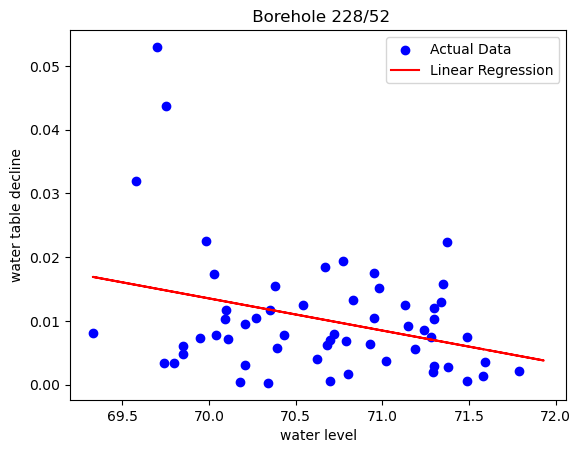

In [56]:
# plots of wte against mrc and shwing the linear type mrc

def plot_linear_regression(df5, b_index, sl_index):

    col1 = df5.columns[(b_index - 0) * 2]
    col2 = df5.columns[(b_index - 0) * 2 + 1]

    x = df5[col1]
    y = df5[col2]

    b1 = df6['slope'].loc[(sl_index - 0) * 1]
    b0 = df6['intercept'].loc[(sl_index - 0) * 1]

    #Plotting
    y_pred = b1 * x + b0

    plt.scatter(x, y, color = 'blue', label = 'Actual Data')

    plt.plot(x, y_pred, color = 'red', label = 'Linear Regression')

    plt.xlabel('water level') 
    plt.ylabel('water table decline')
    plt.title(f' Borehole {col1}')
    plt.legend()
    return plt.show

plot_linear_regression(df5, 2, 2)


# Linear
A linear relation is specified between the water level elevation and the decline rate according to the following equation

Decline rate = dZwt/dt = aZwt + b

In [40]:
dig_col = [col for col in df5.columns if col[0].isdigit()]
df7 = df5[dig_col]


In [41]:
# Create an empty DataFrame to store the predictions
pred_wl_df = pd.DataFrame()

# Loop through each water level column in 'df'
for column in df7.columns:
    # Extract the slope and intercept for the current well
    b1 = df6.loc[df6['borehole'] == column, 'slope'].values[0]
    b0 = df6.loc[df6['borehole'] == column, 'intercept'].values[0]
    
    # Calculate the predicted water level for the current well
    pred_wl = df7[column].shift() - ((b1 * df7[column].shift()) + b0)
    
    # Store the predictions in the DataFrame with a unique column name
    pred_wl_df[f'pred_{column}'] = pred_wl

# Display the DataFrame with all predictions
pred_wl_df

,pred_34/32,pred_219/3,pred_228/52,pred_229/278,pred_229/285,pred_250/37,pred_251/18,pred_251/19,pred_263/12,pred_296/3,...,pred_524/114,pred_524/116,pred_524/40,pred_524/49,pred_524/50,pred_524/51,pred_524/82,pred_524/83,pred_532/153,pred_532/75
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,348.874042,71.068840,71.604592,72.947670,80.921712,89.213333,194.403605,208.687830,217.699333,113.794932,...,NaN,195.230388,248.617833,243.558253,244.785236,236.719144,240.461623,233.889120,150.548354,146.305590
2,348.975977,52.941296,71.715147,72.644387,81.041913,89.626881,198.007694,212.083103,217.597505,117.351612,...,NaN,195.290806,248.398603,243.548255,244.534597,238.556931,240.581826,235.194859,152.304566,146.325572
3,348.466304,51.803960,71.896055,72.290558,81.011863,89.667227,197.268906,213.214861,217.566956,115.789424,...,NaN,195.884912,248.279023,243.538257,244.514546,241.333587,240.772149,235.693233,153.162485,146.315581
4,320.128523,54.457744,71.333230,71.815415,81.142079,89.324285,194.283802,212.473710,217.536408,128.955038,...,NaN,195.391502,248.139513,243.548255,244.514546,242.791831,242.565185,238.334615,154.767299,146.305590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
wat_lev = [col for col in df7.columns]
pred_wl = [col for col in pred_wl_df.columns]

# Pair digit columns with 'pred' columns
paired_columns = [(wat_lev[i], pred_wl[i]) for i in range(min(len(wat_lev), len(pred_wl)))]

# Create new dataframe by concatenating paired columns
df8 = pd.concat([df7[[col[0]]].join (pred_wl_df[[col[1]]]) for col in paired_columns], axis=1)

df8

,34/32,pred_34/32,219/3,pred_219/3,228/52,pred_228/52,229/278,pred_229/278,229/285,pred_229/285,...,524/51,pred_524/51,524/82,pred_524/82,524/83,pred_524/83,532/153,pred_532/153,532/75,pred_532/75
0,348.9,NaN,71.21,NaN,71.61,NaN,72.96,NaN,80.93,NaN,...,236.73,NaN,240.48,NaN,233.89,NaN,150.59,NaN,146.31,NaN
1,349.0,348.874042,53.04,71.068840,71.72,71.604592,72.66,72.947670,81.05,80.921712,...,238.57,236.719144,240.60,240.461623,235.20,233.889120,152.33,150.548354,146.33,146.305590
2,348.5,348.975977,51.90,52.941296,71.90,71.715147,72.31,72.644387,81.02,81.041913,...,241.35,238.556931,240.79,240.581826,235.70,235.194859,153.18,152.304566,146.32,146.325572
3,320.7,348.466304,54.56,51.803960,71.34,71.896055,71.84,72.290558,81.15,81.011863,...,242.81,241.333587,242.58,240.772149,238.35,235.693233,154.77,153.162485,146.31,146.315581
4,349.0,320.128523,57.54,54.457744,71.29,71.333230,70.65,71.815415,81.08,81.142079,...,242.35,242.791831,242.34,242.565185,239.78,238.334615,155.11,154.767299,146.26,146.305590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# computing difference
# Iterate over the columns in pairs
for i in range(0, len(df8.columns), 2):
    actual_col = df8.columns[i]
    pred_col = df8.columns[i+1]

    #compute the difference and store in a new column 
    diff = f'difference_{actual_col}'
    df8[diff] = df8[actual_col] - df8[pred_col]

diff_cols = [col for col in df8.columns if col.startswith('difference_')]

diff = df8[diff_cols]
#diff.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/diffs_1.csv", index=False)
diff

,difference_34/32,difference_219/3,difference_228/52,difference_229/278,difference_229/285,difference_250/37,difference_251/18,difference_251/19,difference_263/12,difference_296/3,...,difference_difference_598/114,difference_difference_598/155,difference_difference_605/346,difference_difference_607/451,difference_difference_607/488,difference_difference_524/114,difference_difference_524/40,difference_difference_524/50,difference_difference_524/82,difference_difference_532/153
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.125958,-18.028840,0.115408,-0.287670,0.128288,0.416667,3.756395,3.422170,-0.099333,3.675068,...,-7.397715,NaN,-0.773659,-10.565663,-1.343776,NaN,-0.219580,-2.076092,-1.172503,1.757236
2,-0.475977,-1.041296,0.184853,-0.334387,-0.021913,0.043119,-0.587694,1.156897,-0.027505,-1.471612,...,-6.539034,NaN,4.629922,1.986228,-1.432353,NaN,-0.120348,-2.787666,-0.296967,0.881006
3,-27.766304,2.756040,-0.556055,-0.450558,0.138137,-0.337227,-2.838906,-0.714861,-0.026956,13.490576,...,15.858744,NaN,4.488320,5.971223,-0.111500,NaN,-0.160765,-1.450959,-0.848915,1.613096
4,28.871477,3.082256,-0.043230,-1.165415,-0.062079,-0.034285,-2.873802,-3.143710,-0.086408,3.174962,...,-1.525659,NaN,1.637382,26.153243,5.142256,NaN,-0.101257,0.447285,-1.670571,0.388292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Load the DataFrame
bh_sy = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_specific_yield.csv")

# Initialize an empty dictionary to store recharge values for each borehole
recharge_dict = {}

# Iterate through each borehole in the bh_sy DataFrame
for borehole in bh_sy['borehole']:
    # Filter rows for the current borehole
    filter_row = bh_sy[bh_sy['borehole'] == borehole]
    
    # Extract specific yield for the current borehole
    borehole_sy = filter_row['sy'].iloc[0]
    
    # Extract difference for the current borehole from the `diff` DataFrame
    borehole_diff_col = f'difference_{borehole}'  # Construct the column name
    borehole_diff = diff[borehole_diff_col]
    
    # Calculate recharge for the current borehole
    recharge = borehole_sy * borehole_diff
    
    # Store recharge values in the dictionary with borehole name as key
    recharge_dict[f'rech_{borehole}'] = recharge

# Convert the dictionary to a DataFrame
recharge_df = pd.DataFrame(recharge_dict)

# Now `recharge_df` contains the calculated recharge values for all boreholes
#recharge_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/diff_sy.csv", index=False)
recharge_df

,rech_34/32,rech_512/32,rech_524/116,rech_524/114,rech_512/215,rech_501/63,rech_513/34,rech_513/35,rech_512/50,rech_524/49,...,rech_229/278,rech_250/37,rech_251/19,rech_251/18,rech_263/12,rech_299/60,rech_299/74,rech_299/79,rech_310/158,rech_519/300
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003275,0.001171,0.001550,NaN,-0.016714,NaN,0.001871,0.006150,0.007785,0.000305,...,-0.043150,0.058333,0.136887,0.150256,-0.003973,-0.641560,0.000384,-0.513702,0.058723,0.030431
2,-0.012375,0.001173,0.015319,NaN,-0.038864,NaN,0.001356,0.009790,0.004049,0.000305,...,-0.050158,0.006037,0.046276,-0.023508,-0.001100,-0.198007,-0.050823,-0.366043,-0.126508,-0.102681
3,-0.721924,0.000394,-0.012868,NaN,0.059909,NaN,0.000578,0.012391,0.004023,0.000825,...,-0.067584,-0.047212,-0.028594,-0.113556,-0.001078,-0.474751,-0.119135,NaN,-0.275636,-0.028027
4,0.750658,0.000393,-0.001859,NaN,0.026920,NaN,0.000838,0.004072,0.003218,-0.000215,...,-0.174812,-0.004800,-0.125748,-0.114952,-0.003456,0.484563,0.124561,NaN,0.020119,-0.014673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Create a new DataFrame with negative values replaced by zero
recharge_non_negative_df = recharge_df.map(lambda x: max(0, x))

# Print the new DataFrame
recharge_non_negative_df

,rech_34/32,rech_512/32,rech_524/116,rech_524/114,rech_512/215,rech_501/63,rech_513/34,rech_513/35,rech_512/50,rech_524/49,...,rech_229/278,rech_250/37,rech_251/19,rech_251/18,rech_263/12,rech_299/60,rech_299/74,rech_299/79,rech_310/158,rech_519/300
0,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
1,0.003275,0.001171,0.001550,0,0.000000,0,0.001871,0.006150,0.007785,0.000305,...,0.0,0.058333,0.136887,0.150256,0.0,0.000000,0.000384,0,0.058723,0.030431
2,0.000000,0.001173,0.015319,0,0.000000,0,0.001356,0.009790,0.004049,0.000305,...,0.0,0.006037,0.046276,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
3,0.000000,0.000394,0.000000,0,0.059909,0,0.000578,0.012391,0.004023,0.000825,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
4,0.750658,0.000393,0.000000,0,0.026920,0,0.000838,0.004072,0.003218,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.484563,0.124561,0,0.020119,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
62183,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
62184,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000
62185,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000


In [22]:
date_col2 = [col for col in df2.columns if col.startswith('date_')]
rech_col2 = [col for col in recharge_non_negative_df.columns]
date_parts = {col.split('date_')[1]: col for col in date_col2}
rech_parts = {col.split('rech_')[1]: col for col in rech_col2}

# Finding common parts and pairing the columns
paired_columns = [(date_parts[part], rech_parts[part]) for part in date_parts if part in rech_parts]

#Create new dataframe by concatenating paired columns
date_rech_df = pd.concat([df2[[water_level]].join(recharge_non_negative_df[rech_col]) for water_level, rech_col in paired_columns], axis=1)
#date_rech_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/before_slope.csv", index=False)
date_rech_df

,date_34/32,rech_34/32,date_219/3,rech_219/3,date_228/52,rech_228/52,date_229/278,rech_229/278,date_229/285,rech_229/285,...,date_524/51,rech_524/51,date_524/82,rech_524/82,date_524/83,rech_524/83,date_532/153,rech_532/153,date_532/75,rech_532/75
0,2015-01-02,0.000000,1979-03-01,0.000000,2007-01-11,0.000000,2009-02-20,0.0,2020-01-24,0.000000,...,1996-01-30,0.000000,2000-10-10,0.000000,2000-10-10,0.000000,2000-10-10,0.000000,2000-10-01,0.000000
1,2015-01-31,0.003275,1979-06-01,0.000000,2007-02-09,0.017311,2009-03-20,0.0,2020-02-17,0.019243,...,1996-03-06,0.048122,2000-11-15,0.003598,2000-11-15,0.034083,2000-11-16,0.267247,2000-10-15,0.003661
2,2015-02-28,0.000000,1979-08-01,0.000000,2007-03-07,0.027728,2009-04-20,0.0,2020-03-17,0.000000,...,1996-11-20,0.072620,2000-12-19,0.005413,2000-12-20,0.013134,2000-12-20,0.131315,2000-11-01,0.000000
3,2015-04-01,0.000000,1979-10-01,0.385846,2007-04-19,0.000000,2009-05-18,0.0,2020-04-20,0.020721,...,1997-01-15,0.038387,2001-01-18,0.047004,2001-01-18,0.069076,2001-01-18,0.241127,2000-11-15,0.000000
4,2015-05-01,0.750658,1980-03-01,0.431516,2007-05-14,0.000000,2009-06-17,0.0,2020-05-18,0.000000,...,1997-04-30,0.000000,2001-02-15,0.000000,2001-02-15,0.037580,2001-02-15,0.051405,2000-12-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.0,NaT,0.000000,...,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000
62183,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.0,NaT,0.000000,...,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000
62184,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.0,NaT,0.000000,...,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000
62185,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.0,NaT,0.000000,...,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000,NaT,0.000000


In [57]:
# Convert 'date_34/32' to datetime if it's not already
date_rech_df['date_219/3'] = pd.to_datetime(date_rech_df['date_219/3'], format = '%d/%m/%Y', errors='coerce')
# Extract year from 'date_34/32'
date_rech_df['year'] = date_rech_df['date_219/3'].dt.year
# Group by year and sum the 'rech_34/32' values
yearly_sum = date_rech_df.groupby('year')['rech_219/3'].sum().reset_index()
# Check the resulting DataFrame
print(yearly_sum)

      year  rech_219/3
0   1979.0    0.385846
1   1980.0    0.862728
2   1981.0    0.323474
3   1982.0    2.188243
4   1983.0    3.605821
5   1984.0    3.135242
6   1985.0    3.213644
7   1986.0    0.390762
8   1987.0    5.092892
9   1988.0    3.322444
10  1989.0    3.318763
11  1990.0    0.680178
12  1991.0    3.420679
13  1992.0    2.602207
14  1993.0    5.617332
15  1994.0    1.808884
16  1995.0    3.529628
17  1996.0    4.278201
18  1997.0    5.342889
19  1998.0    2.854663
20  1999.0    0.371970


In [58]:
if (yearly_sum['rech_219/3'] > 0).any():
    yearly_avg = yearly_sum['rech_219/3'].mean() * 1000
print(yearly_avg)

2683.1661778816065


In [90]:
# Function to extract borehole names from column names
borehole_names = [col[len('date_'):] for col in date_rech_df.columns if col.startswith('date_')]

def bh_datapair(date_rech_df, borehole_name):
    # Define columns based on borehole name
    col1 = f'date_{borehole_name}'
    col2 = f'rech_{borehole_name}'
    # select the two columns
    selected_columns = date_rech_df[[col1, col2]].copy()
    return selected_columns

# Dictionary to store yearly sums for each borehole
yearly_sums = {}
average_annual_recharge = {}

for borehole_name in borehole_names:
    # Get the data pair for the current borehole
    selected_columns = bh_datapair(date_rech_df, borehole_name)
    # Rename columns for convenience
    selected_columns.columns = ['date', 'recharge']
    # Convert 'date' to datetime
    selected_columns['date'] = pd.to_datetime(selected_columns['date'], format='%d/%m/%Y', errors='coerce')
    # Extract year from 'date'
    selected_columns['year'] = selected_columns['date'].dt.year
    # Group by year and sum the 'recharge' values
    yearly_sum = selected_columns.groupby('year')['recharge'].sum().reset_index()
    # Store the result in the dictionary
    yearly_sums[borehole_name] = yearly_sum

    # Calculate average annual recharge if there are any positive recharge values
    if (yearly_sum['recharge'] > 0).any():
        yearly_avg = yearly_sum['recharge'].mean() * 1000
        average_annual_recharge[borehole_name] = yearly_avg
    else:
        average_annual_recharge[borehole_name] = 0
    

# Print the resulting yearly sums
'''for borehole_name, yearly_sum in yearly_sums.items():
    print(f'Yearly sums for borehole {borehole_name}:')
    print(yearly_sum)
    print()'''

print('Average annual recharge:')
for borehole_name, avg_recharge in average_annual_recharge.items():
    print(f'{borehole_name}: {avg_recharge}')

# Convert the average annual recharge dictionary to a DataFrame
average_annual_recharge_df = pd.DataFrame(list(average_annual_recharge.items()), columns=['Borehole', 'Average Annual Recharge (mm)'])
#average_annual_recharge_df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/average_annual_recharge_df_MRC1.csv')

Average annual recharge:
34/32: 232.86314780203048
219/3: 2683.1661778816065
228/52: 200.9146154517175
229/278: 802.978185380797
229/285: 281.3930361136435
250/37: 309.00754173443374
251/18: 966.0325233267266
251/19: 270.3762409969549
263/12: 37.46999023304026
296/3: 1432.194639615795
296/57: 1522.6797901923549
310/227: 114.94854484613117
299/60: 520.043680654787
299/74: 141.19365924617205
299/79: 0
309/32: 0
310/158: 181.89310613885561
317/225: 8641.97109278407
317/235: 2706.4307366175913
318/2: 2151.119656505598
327/72: 9384.78250735739
335/56: 261.8470874009478
347/89: 534.6096765621749
348/43: 453.05916597372845
348/44: 440.78794959016705
348/45: 426.2869579548768
349/101: 0
370/5: 0
371/45: 208.20098457017184
384/103: 0
384/2: 514.5944569002389
387/4: 146.28237187131717
387/8: 19.469068642424702
396/161: 286.01401282625454
397/167: 443.7035395349276
397/168: 437.59637177038053
397/87: 384.17757161136853
397/91: 436.6962711127616
399/12: 287.52974535119483
399/6: 678.2507192640538
